# クリーク被覆問題

問題: 与えられた無向グラフを，最小の数のクリークで被覆せよ -> NP困難

- 頂点集合を被覆する場合: 補グラフのグラフ彩色問題と等価
    - グラフ彩色問題: 隣り合う頂点を異なる色で塗り分け，最も少ない色を使用する -> 同じ色の集合(どの点も隣り合わない)とクリーク(どの点も隣り合う)が対応
- 辺を被覆する場合: あまり実用例はないらしい？

先に極大クリークを列挙することで，集合被覆問題としてモデル化できる: $G=(V,E)$をグラフ，$C$を$G$の極大クリークの集合として
\begin{align*}
&\mathrm{Minimize\ } && \sum_{c\in C} x_c \\
&\mathrm{subject\ to\ } && \sum_{c\in C_i} x_c \ge 1 \quad \forall i \in V　\\
& && x_c \in \{0,1\} \quad \forall c \in C　
\end{align*}
ここで $C_i\subset C$ は頂点 $i\in V$ を含む極大クリークの集合

In [1]:
import random
import networkx as nx

n = 100
random.seed(1)
pos = {i: (random.random(), random.random()) for i in range(n)}
G = nx.random_geometric_graph(n, 0.3, pos=pos, seed=1)

In [3]:
len(list(nx.find_cliques(G)))

151

In [2]:
from pyscipopt import Model, quicksum

model = Model()
x = {}
nodes = {}
for i, c in enumerate(nx.find_cliques(G)):
    x[i] = model.addVar(vtype="B", name=f"x[{i}]")
    nodes[i] = c
cliques = {}  # 点iを含んでいるクリークの集合
for i in range(n):
    cliques[i] = []
for c in nodes:
    for i in nodes[c]:
        cliques[i].append(c)
for i in range(n):
    model.addCons(quicksum(x[c] for c in cliques[i]) >= 1)
model.setObjective(quicksum(x[c] for c in x), sense='minimize')

In [3]:
model.optimize()

feasible solution found by trivial heuristic after 0.0 seconds, objective value 1.510000e+02
presolving:
(round 1, fast)       1 del vars, 3 del conss, 0 add conss, 1 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3 clqs
(round 2, fast)       1 del vars, 6 del conss, 0 add conss, 1 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3 clqs
(round 3, exhaustive) 1 del vars, 48 del conss, 0 add conss, 1 chg bounds, 37 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 3 clqs
(round 4, fast)       2 del vars, 49 del conss, 0 add conss, 1 chg bounds, 37 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 2 clqs
(round 5, fast)       3 del vars, 50 del conss, 0 add conss, 1 chg bounds, 37 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 2 clqs
(round 6, exhaustive) 3 del vars, 50 del conss, 0 add conss, 1 chg bounds, 37 chg sides, 0 chg coeffs, 50 upgd conss, 0 impls, 2 clqs
(round 7, fast)       8 del vars, 50 del conss, 0 add conss, 1 chg bounds, 37 chg sides, 0 chg coeff

In [4]:
import numpy as np

sol = model.getBestSol()

lhs = np.zeros(n)
for c in x:
    if sol[x[c]] > 0.001:
        for i in nodes[c]:
            lhs[i] += 1

edges = []
for c in x:
    if sol[x[c]] > 0.001:
        # print(nodes[c])
        for i in nodes[c]:
            for j in nodes[c]:
                if i != j:
                    edges.append((i, j))

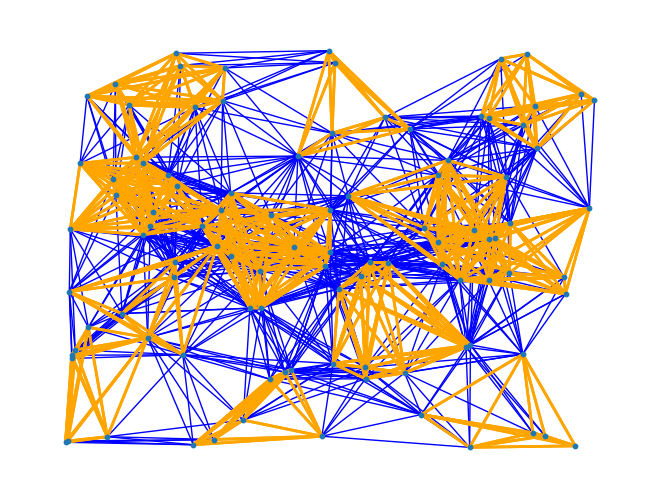

In [5]:
import matplotlib.pyplot as plt

plt.figure()
nx.draw(G, pos=pos, with_labels=False, node_size=10, edge_color="blue")
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="orange", width=2)
plt.show()